In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

from test_functions import *

set_matplotlib_style()

In [2]:
run_path = '/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run243-Pool4_treeParam.root'

In [3]:
tree = get_tree(run_path, 'ParameterTree')
print(tree.keys())

['eventNo', 'evtime', 'npeaks_C1', 'peakparam_C1', 'peakparam_C1/peakparam_C1.fUniqueID', 'peakparam_C1/peakparam_C1.fBits', 'peakparam_C1/peakparam_C1.maxtime_pos', 'peakparam_C1/peakparam_C1.stime_pos', 'peakparam_C1/peakparam_C1.ftime_pos', 'peakparam_C1/peakparam_C1.e_peak_end_pos', 'peakparam_C1/peakparam_C1.sig_start_pos', 'peakparam_C1/peakparam_C1.sig_end_pos', 'peakparam_C1/peakparam_C1.tot_sig_end_pos', 'peakparam_C1/peakparam_C1.maxtime', 'peakparam_C1/peakparam_C1.ampl', 'peakparam_C1/peakparam_C1.dampl', 'peakparam_C1/peakparam_C1.e_peak_end_ampl', 'peakparam_C1/peakparam_C1.sampl', 'peakparam_C1/peakparam_C1.fampl', 'peakparam_C1/peakparam_C1.tfit20', 'peakparam_C1/peakparam_C1.tnaive20', 'peakparam_C1/peakparam_C1.te_peak_end', 'peakparam_C1/peakparam_C1.echargefixed', 'peakparam_C1/peakparam_C1.echarge', 'peakparam_C1/peakparam_C1.echargefit', 'peakparam_C1/peakparam_C1.ioncharge', 'peakparam_C1/peakparam_C1.totcharge', 'peakparam_C1/peakparam_C1.totchargefixed', 'peakp

In [4]:
event_start, event_end = 4416, None
min_ampl, max_ampl = -2, 2  # V
min_charge, max_charge = -1, 20.0  # fC
min_charge_tot, max_charge_tot = -1, 50.0  # fC

In [5]:
channels = ['C1', 'C2', 'C4']
global_vars = ['eventNo']
channel_vars = ['ampl', 'dampl', 'charge','echargefit','echargefixed','totcharge', 'totchargefixed', 'tfit20', 'tnaive20', 'hitX[200]', 'hitY[200]']

branches = []
for channel in channels:
    for var in channel_vars:
        branches.append(f'peakparam_{channel}/peakparam_{channel}.{var}')
for var in global_vars:
    branches.append(var)
df = get_df_branches(tree, branches)

if event_start is not None:
    df = df[df['eventNo'] >= event_start]
if event_end is not None:
    df = df[df['eventNo'] <= event_end]

<Report start=0 stop=30400 source='/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/ParameterTrees/Run243-Pool4_treeParam.root:/ParameterTree;1'>


In [6]:
print(df.head())

                   peakparam_C1/peakparam_C1.ampl  \
4416   [0.19133204562423342, 0.01519279522655124]   
4417  [0.31153464431401623, 0.021108539053167227]   
4418                         [0.3194649865400707]   
4419  [0.30146241667062745, 0.014642660639591097]   
4420                        [0.27332238132596365]   

      peakparam_C1/peakparam_C1.dampl  \
4416                 [-999.0, -999.0]   
4417                 [-999.0, -999.0]   
4418                         [-999.0]   
4419                 [-999.0, -999.0]   
4420                         [-999.0]   

                 peakparam_C1/peakparam_C1.charge  \
4416   [0.13386025689765224, 0.01004852474629378]   
4417  [0.20330250646608466, 0.014074701130466832]   
4418                        [0.21987406433234535]   
4419    [0.21115612739511344, 0.0084584238879925]   
4420                        [0.18670365569346803]   

      peakparam_C1/peakparam_C1.echargefit  \
4416                    [-9999.0, -9999.0]   
4417                   

In [7]:

# get_single_track(df, 'C1', (median_x, median_y))
# get_single_track(df, 'C1', (20, 20))

In [8]:
for channel in channels:
    get_single_peak(df, channel)
    # get_single_track(df, channel)
# Get MCP center using all tracks
median_x, median_y = get_center_all_tracks(df, 'C1')
print(median_x, median_y)
get_closest_track_indices(df, 'C1', (median_x, median_y))

# print(df['closest_hit_index'])

# get_single_track(df, 'C1', np.array(df['closest_hit_index']))
# get_single_track(df, 'C1', 0)
# get_single_track(df, 'C2', 0)
# get_single_track(df, 'C4', 0)

print(df.head())


29.45545482635498 27.171738624572754
hit_x: [   76.14204407    26.11735916 -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -1111.         -1111.         -1111.         -1111.
 -

In [9]:
print(df.iloc[2])
print(type(df.iloc[2]['peakparam_C4/peakparam_C4.hitX[200]']))
print(type(df.iloc[2]['peakparam_C1/peakparam_C1.hitX[200]']))

peakparam_C1/peakparam_C1.ampl                                                       0.319465
peakparam_C1/peakparam_C1.dampl                                                        -999.0
peakparam_C1/peakparam_C1.charge                                                     0.219874
peakparam_C1/peakparam_C1.echargefit                                                  -9999.0
peakparam_C1/peakparam_C1.echargefixed                                                -9999.0
peakparam_C1/peakparam_C1.totcharge                                                   -9999.0
peakparam_C1/peakparam_C1.totchargefixed                                              -9999.0
peakparam_C1/peakparam_C1.tfit20                                                    214.81856
peakparam_C1/peakparam_C1.tnaive20                                                 214.362604
peakparam_C1/peakparam_C1.hitX[200]         [76.14204406738281, 26.117359161376953, -1111....
peakparam_C1/peakparam_C1.hitY[200]         [45.544525146484

In [10]:
# print(df['peakparam_C1/peakparam_C1.hitY[200]'])
# print(np.array(df['closest_hit_index']))
# print(len(df['peakparam_C1/peakparam_C1.hitX[200]']))
# print(len(df['closest_hit_index']))
# closest_hit_x, closest_hit_y = [], []
# for row_i, row in df.iterrows():
#     for channel in channels:
#         x_hits = row[f'peakparam_{channel}/peakparam_{channel}.hitX[200]']
#         if isinstance(x_hits, list):
#             good_hit_x = row[f'peakparam_{channel}/peakparam_{channel}.hitX[200]'][row['closest_hit_index']]
#         else:
#             good_hit_x = x_hits
#         df.loc[row_i][f'peakparam_{channel}/peakparam_{channel}.hitX[200]'] = good_hit_x
#
#         y_hits = row[f'peakparam_{channel}/peakparam_{channel}.hitY[200]']
#         if isinstance(y_hits, list):
#             good_hit_y = row[f'peakparam_{channel}/peakparam_{channel}.hitY[200]'][row['closest_hit_index']]
#         else:
#             good_hit_y = y_hits
#         df.loc[row_i][f'peakparam_{channel}/peakparam_{channel}.hitY[200]'] = good_hit_y



In [11]:
print(df['closest_hit_index'])
print(df['peakparam_C1/peakparam_C1.hitX[200]'])
df['test'] = df.apply(lambda row: row['peakparam_C1/peakparam_C1.hitX[200]'][row['closest_hit_index']], axis=1)
print(df['test'])

for channel in channels:
    for xy in ['X', 'Y']:
        col_name = f'peakparam_{channel}/peakparam_{channel}.hit{xy}[200]'
        df[col_name] = df.apply(lambda row: row[col_name][row['closest_hit_index']] if isinstance(row[col_name], list) and ~np.isnan(row['closest_hit_index']) else np.nan, axis=1)


4416     0
4417     0
4418     1
4419     0
4420     0
        ..
30395    0
30396    0
30397    0
30398    0
30399    0
Name: closest_hit_index, Length: 25984, dtype: int64
4416     [35.29307556152344, -1111.0, -1111.0, -1111.0,...
4417     [25.65353012084961, -1111.0, -1111.0, -1111.0,...
4418     [76.14204406738281, 26.117359161376953, -1111....
4419     [-1111.0, -1111.0, -1111.0, -1111.0, -1111.0, ...
4420     [31.524520874023438, -1111.0, -1111.0, -1111.0...
                               ...                        
30395    [29.1068172454834, -1111.0, -1111.0, -1111.0, ...
30396    [29.552072525024414, -1111.0, -1111.0, -1111.0...
30397    [34.347373962402344, -1111.0, -1111.0, -1111.0...
30398    [33.68037414550781, -1111.0, -1111.0, -1111.0,...
30399    [27.692237854003906, -1111.0, -1111.0, -1111.0...
Name: peakparam_C1/peakparam_C1.hitX[200], Length: 25984, dtype: object
4416       35.293076
4417       25.653530
4418       26.117359
4419    -1111.000000
4420       31.524521


In [12]:
print(df.loc[4416])

peakparam_C1/peakparam_C1.ampl                                                       0.191332
peakparam_C1/peakparam_C1.dampl                                                        -999.0
peakparam_C1/peakparam_C1.charge                                                      0.13386
peakparam_C1/peakparam_C1.echargefit                                                  -9999.0
peakparam_C1/peakparam_C1.echargefixed                                                -9999.0
peakparam_C1/peakparam_C1.totcharge                                                   -9999.0
peakparam_C1/peakparam_C1.totchargefixed                                              -9999.0
peakparam_C1/peakparam_C1.tfit20                                                   209.619229
peakparam_C1/peakparam_C1.tnaive20                                                 209.217413
peakparam_C1/peakparam_C1.hitX[200]                                                 35.293076
peakparam_C1/peakparam_C1.hitY[200]                         

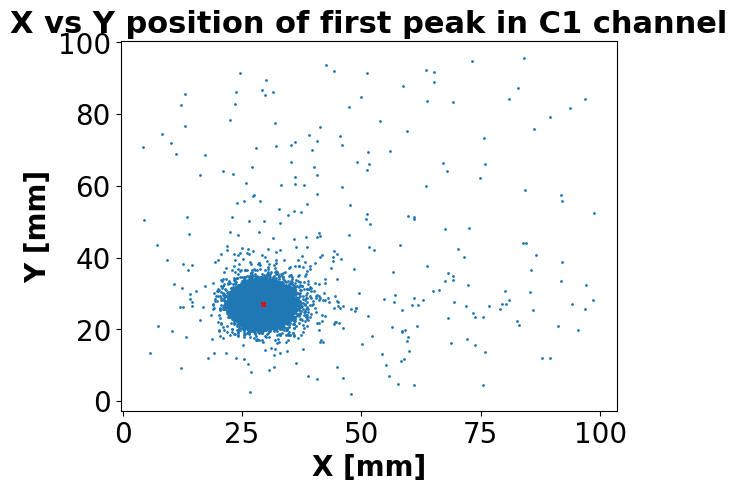

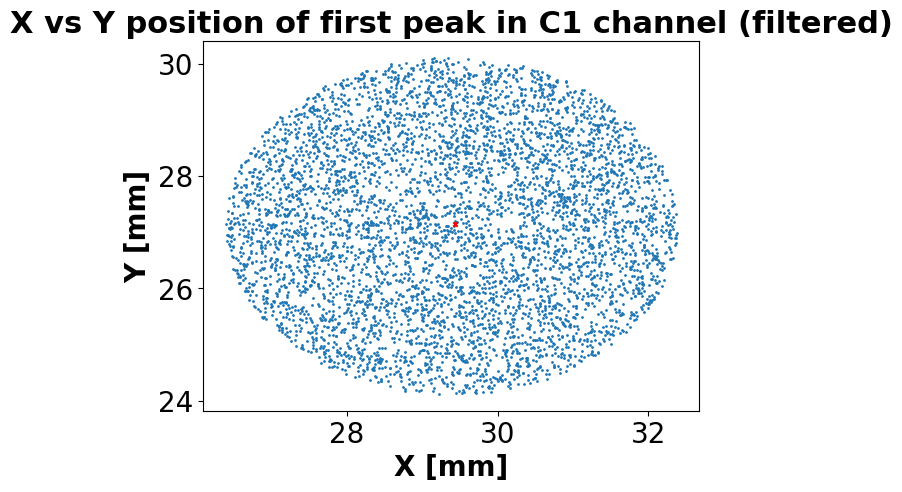

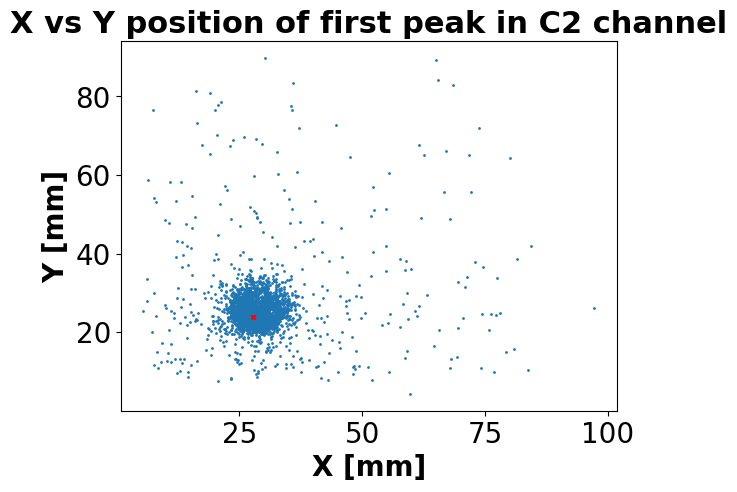

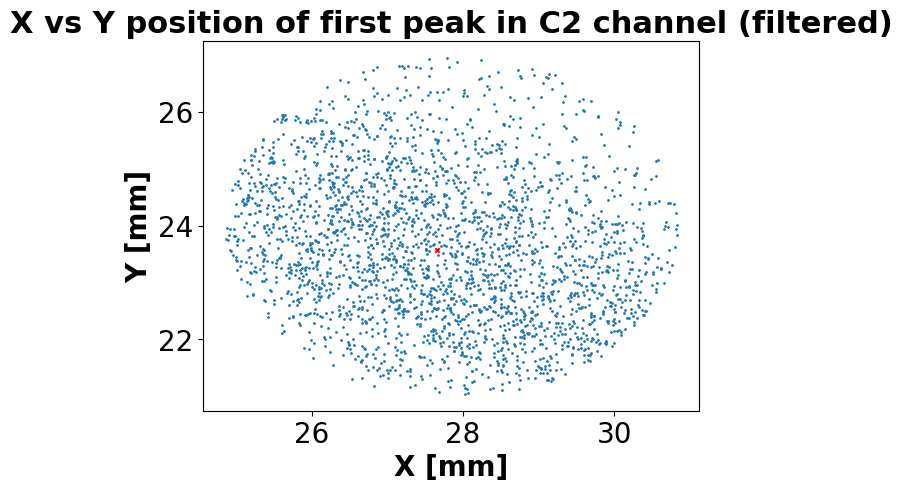

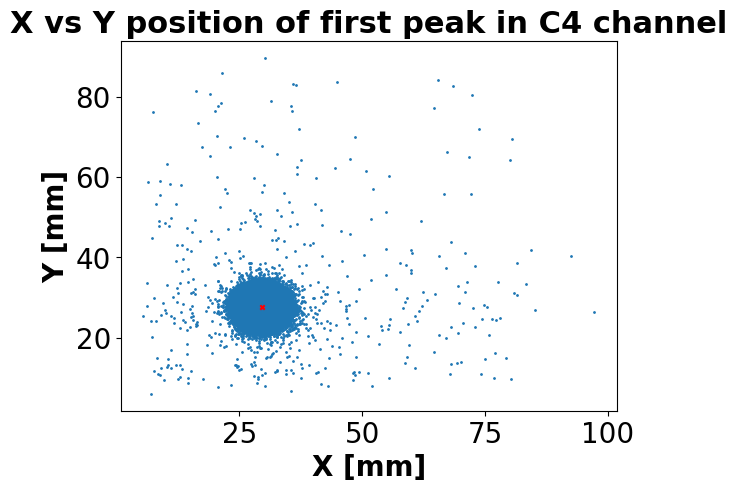

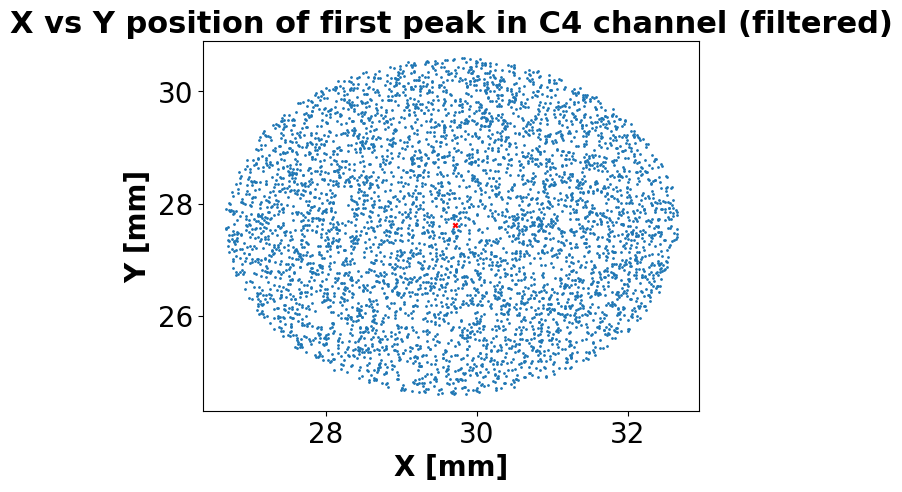

In [13]:
channels = ['C1', 'C2', 'C4']
filter_dict = {}
for channel in channels:
    first_c_xs = df[f'peakparam_{channel}/peakparam_{channel}.hitX[200]']
    first_c_xs = np.array(first_c_xs)

    first_c_xs_plt = first_c_xs[(first_c_xs > -100) & (first_c_xs < 100)]
    median_x = np.median(first_c_xs_plt)

    first_c_ys = df[f'peakparam_{channel}/peakparam_{channel}.hitY[200]']
    first_c_ys = np.array(first_c_ys)

    first_c_ys_plt = first_c_ys[(first_c_ys > -100) & (first_c_ys < 100)]
    median_y = np.median(first_c_ys_plt)

    fig, ax = plt.subplots()
    ax.scatter(first_c_xs_plt, first_c_ys_plt, s=1)
    ax.scatter(median_x, median_y, s=10, c='red', marker='x')
    ax.set_title(f'X vs Y position of first peak in {channel} channel')
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')

    # Select events within 10 mm of the median
    r = np.sqrt((first_c_xs - median_x)**2 + (first_c_ys - median_y)**2)
    # filter = (1 < r) & (r < 3)
    filter = r < 3
    first_c_xs_filtered = first_c_xs[filter]
    first_c_ys_filtered = first_c_ys[filter]
    median_x = np.median(first_c_xs_filtered)
    median_y = np.median(first_c_ys_filtered)

    filter_dict.update({channel: filter})

    fig, ax = plt.subplots()
    ax.scatter(first_c_xs_filtered, first_c_ys_filtered, s=1)
    ax.scatter(median_x, median_y, s=10, c='red', marker='x')
    ax.set_title(f'X vs Y position of first peak in {channel} channel (filtered)')
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')


plt.show()


C1 Number of outliers: 0 of 25984
C1 Number after filter: 25984 of 25984
C1 channel: min = 0.012497826801337581, max = 0.780148545889383
[False False False ... False False False]
C1 channel: min = 0.014984740229233559, max = 0.779766428866071
C2 Number of outliers: 4 of 25984
C2 Number after filter: 4984 of 25984
C2 channel: min = -1.1064713598079476e-16, max = 0.42080213151480894
[False False False ... False False False]
C2 channel: min = 0.002130337904136105, max = 0.4156256524057892
C4 Number of outliers: 6 of 25984
C4 Number after filter: 21775 of 25984
C4 channel: min = -4.059830067122186e-12, max = 0.4226190158390923
[False False False ... False False False]
C4 channel: min = 0.0012917159616351677, max = 0.4203665133910493


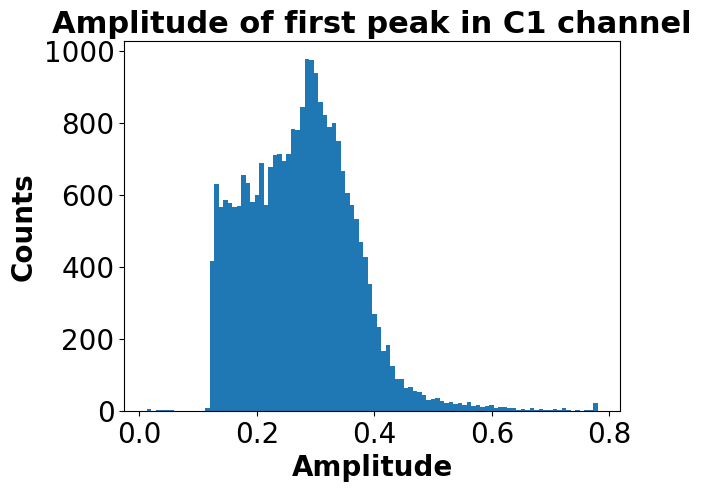

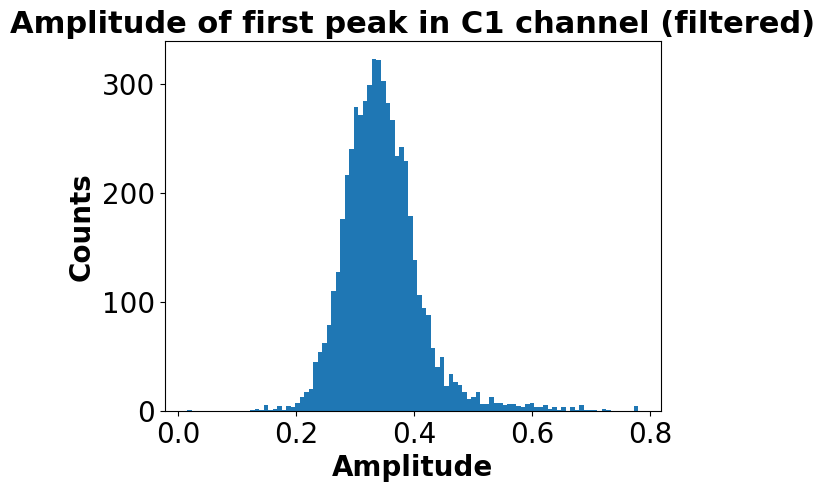

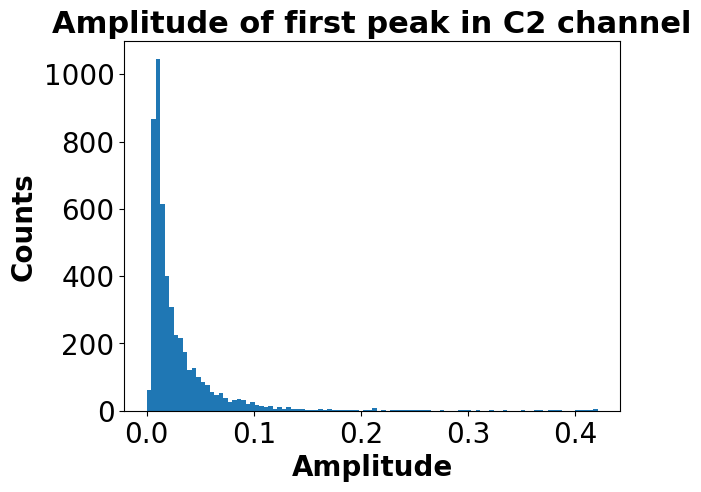

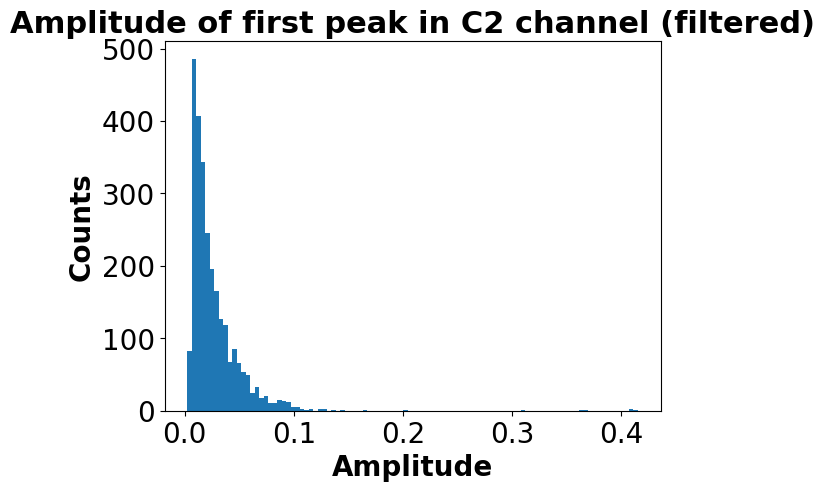

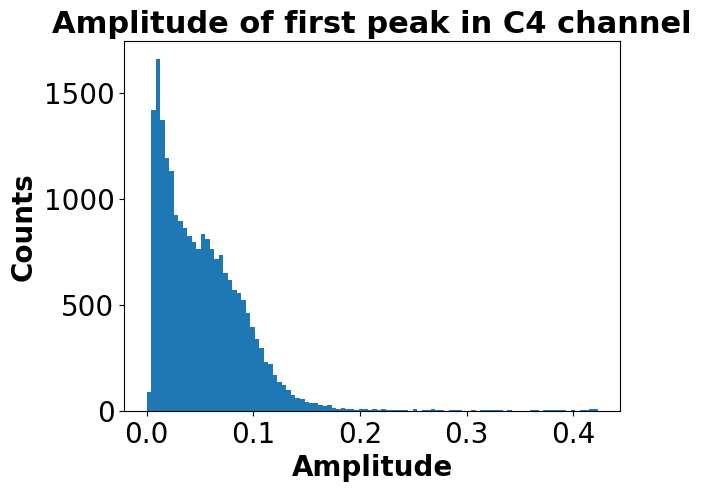

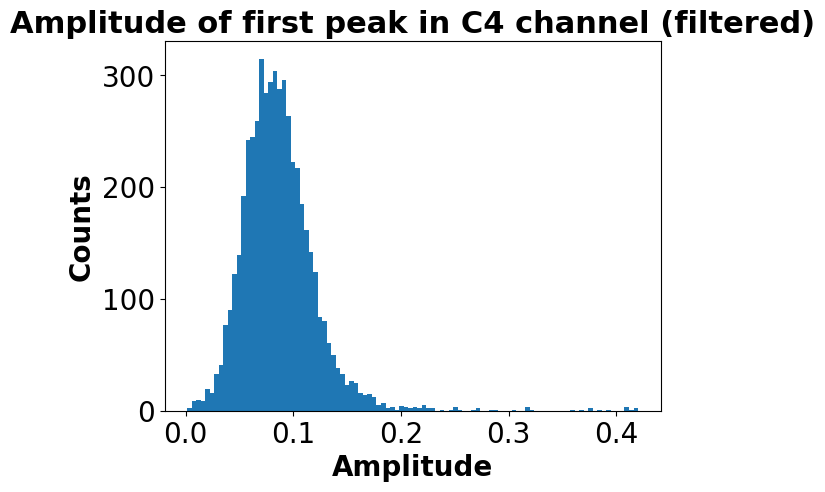

In [14]:
for channel in ['C1', 'C2', 'C4']:
    first_ampls = df[f'peakparam_{channel}/peakparam_{channel}.ampl']
    df[f'peakparam_{channel}/peakparam_{channel}.ampl_filtered'] = first_ampls.apply(lambda x: x if (x > min_ampl) & (x < max_ampl) else np.nan)
    first_ampls = np.array(first_ampls)
    first_ampls_filtered = first_ampls[(first_ampls > min_ampl) & (first_ampls < max_ampl)]
    first_ampls_outliers = first_ampls[(first_ampls < min_ampl) | (first_ampls > max_ampl)]
    # Update the dataframe with the filtered amplitudes

    print(f'{channel} Number of outliers: {len(first_ampls_outliers)} of {len(first_ampls)}')
    print(f'{channel} Number after filter: {len(first_ampls_filtered)} of {len(first_ampls)}')
    #plot each channels amplitude in a histogram
    #print range of amplitudes
    print(f'{channel} channel: min = {np.nanmin(first_ampls_filtered)}, max = {np.nanmax(first_ampls_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_ampls_filtered, bins=100)
    ax.set_title(f'Amplitude of first peak in {channel} channel')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Counts')

    print(filter_dict[channel])
    filtered_first_ampls = first_ampls[filter_dict[channel]]
    filtered_first_ampls = filtered_first_ampls[(filtered_first_ampls > min_ampl) & (filtered_first_ampls < max_ampl)]
    print(f'{channel} channel: min = {np.nanmin(filtered_first_ampls)}, max = {np.nanmax(filtered_first_ampls)}')
    fig, ax = plt.subplots()
    ax.hist(filtered_first_ampls, bins=100)
    ax.set_title(f'Amplitude of first peak in {channel} channel (filtered)')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Counts')
plt.show()


C1 Number of outliers: 25984 of 25984
C2 Number of outliers: 1 of 25984
C2 channel: min = 0.004009692519903183, max = 0.386275645699352
C4 Number of outliers: 2 of 25984
C4 channel: min = 0.004107646364718673, max = 0.3864324754104018


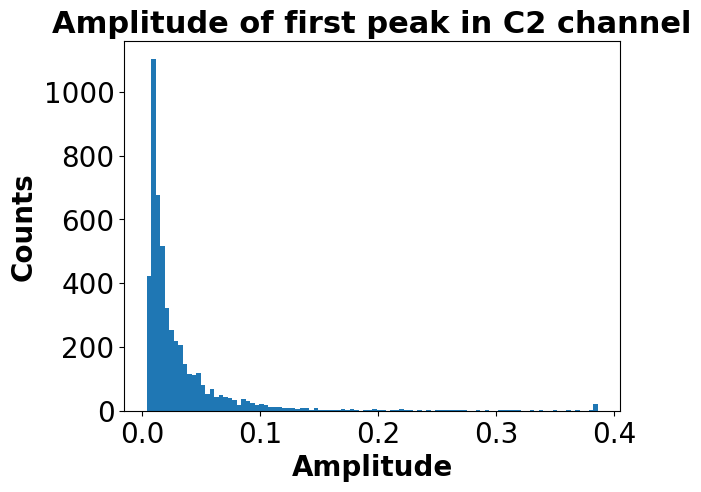

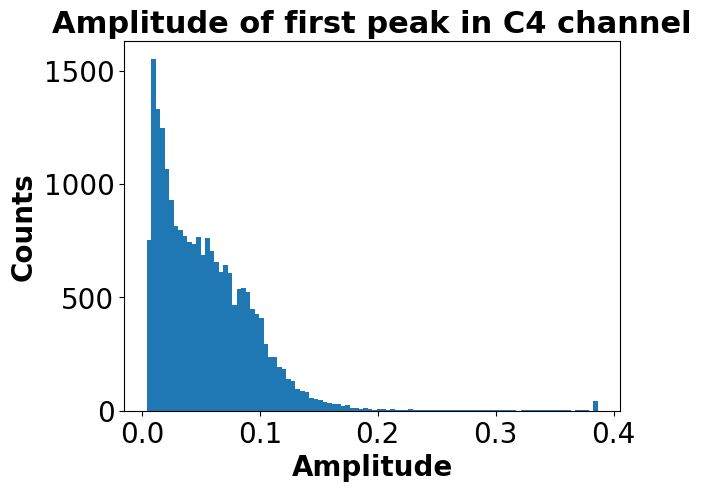

In [15]:
for channel in ['C1', 'C2', 'C4']:
    first_dampls = df[f'peakparam_{channel}/peakparam_{channel}.dampl']

    df[f'peakparam_{channel}/peakparam_{channel}.dampl_filtered'] = first_dampls.apply(lambda x: x if (x > min_ampl) & (x < max_ampl) else np.nan)
    first_dampls = np.array(first_dampls)
    first_dampls_filtered = first_dampls[(first_dampls > min_ampl) & (first_dampls < max_ampl)]
    first_dampls_outliers = first_dampls[(first_dampls < min_ampl) | (first_dampls > max_ampl)]
    print(f'{channel} Number of outliers: {len(first_dampls_outliers)} of {len(first_dampls)}')

    #plot each channels amplitude in a histogram
    #print range of amplitudes
    if len(first_dampls_filtered) <= 0: continue
    print(f'{channel} channel: min = {np.nanmin(first_dampls_filtered)}, max = {np.nanmax(first_dampls_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_dampls_filtered, bins=100)
    ax.set_title(f'Amplitude of first peak in {channel} channel')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Counts')
plt.show()

In [16]:
print(df.head())

      peakparam_C1/peakparam_C1.ampl  peakparam_C1/peakparam_C1.dampl  \
4416                        0.191332                           -999.0   
4417                        0.311535                           -999.0   
4418                        0.319465                           -999.0   
4419                        0.301462                           -999.0   
4420                        0.273322                           -999.0   

      peakparam_C1/peakparam_C1.charge  peakparam_C1/peakparam_C1.echargefit  \
4416                          0.133860                               -9999.0   
4417                          0.203303                               -9999.0   
4418                          0.219874                               -9999.0   
4419                          0.211156                               -9999.0   
4420                          0.186704                               -9999.0   

      peakparam_C1/peakparam_C1.echargefixed  \
4416                            

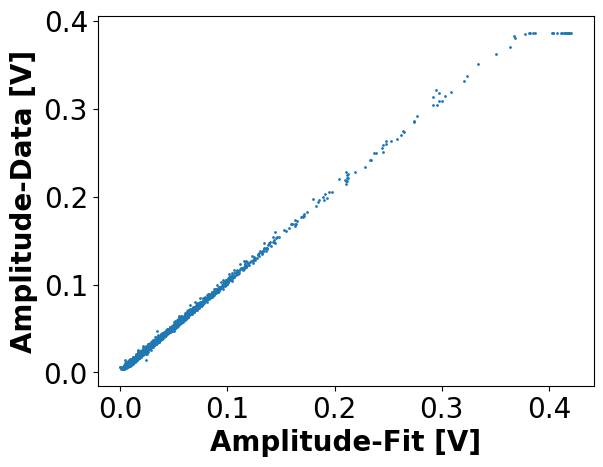

In [17]:
#correlation plot of amplitudes and damplitudes for channel C2 and C4
fig, ax = plt.subplots()
ax.scatter(df['peakparam_C2/peakparam_C2.ampl_filtered'], df['peakparam_C2/peakparam_C2.dampl_filtered'], s=1)
ax.set_title('')
ax.set_xlabel('Amplitude-Fit [V]')
ax.set_ylabel('Amplitude-Data [V]')
plt.show()

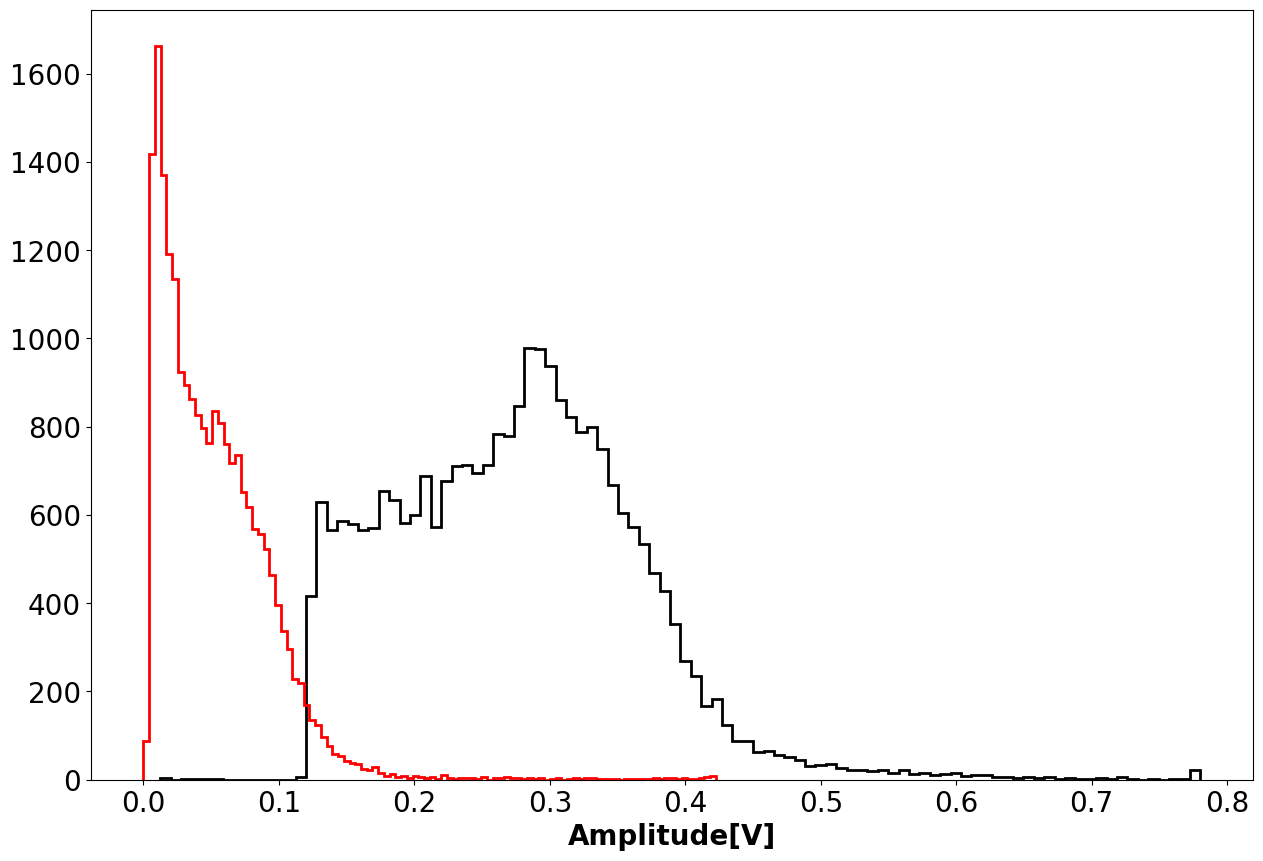

In [18]:
#make a plot with c1 and c4 amplitudes at the same graph
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(df['peakparam_C1/peakparam_C1.ampl_filtered'], bins=100, histtype='step', color='black', lw=2, label=f'MCP-1')
ax.hist(df['peakparam_C4/peakparam_C4.ampl_filtered'], bins=100, histtype='step', color='red', lw=2, label=f'MM-pad0')
ax.set_title('')
ax.set_xlabel('Amplitude[V]')
ax.set_ylabel('')
plt.show()


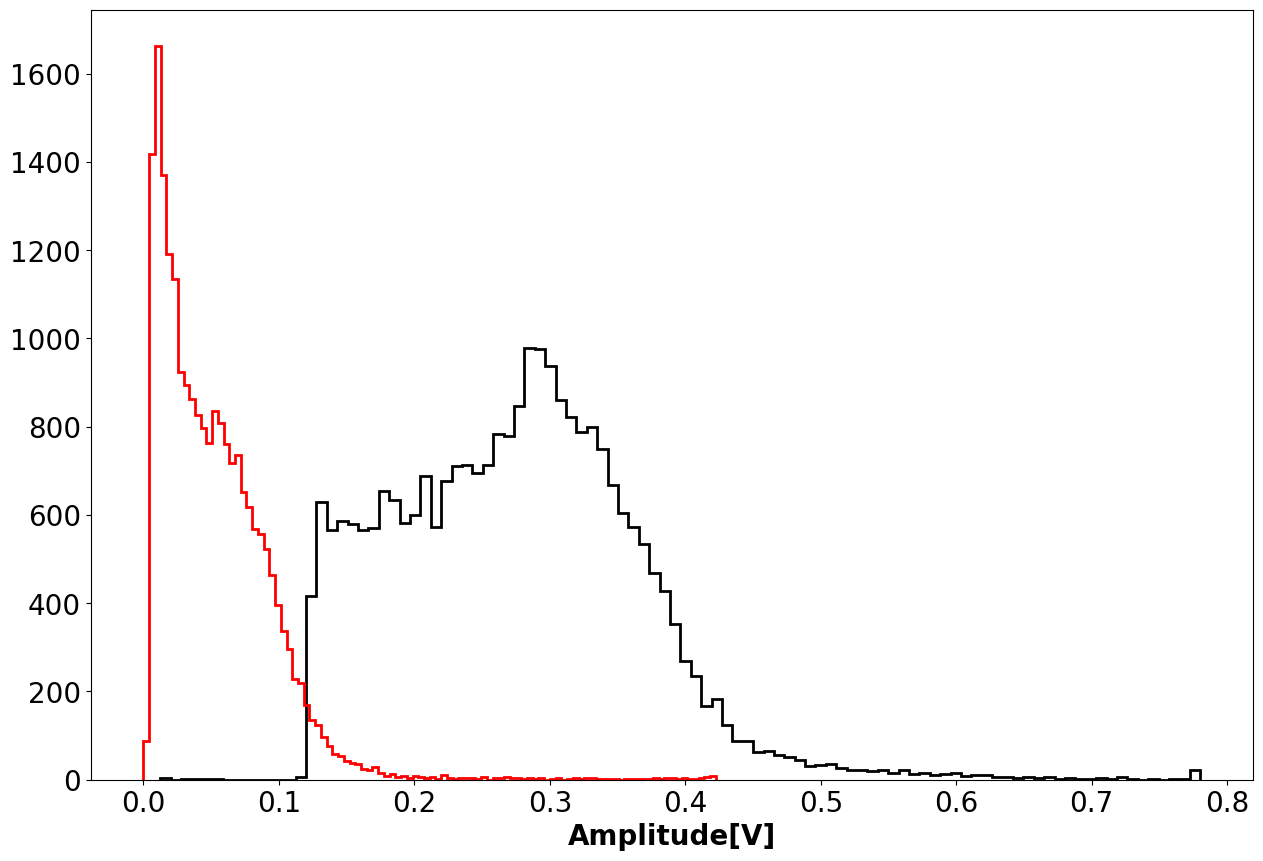

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(df['peakparam_C1/peakparam_C1.ampl_filtered'], bins=100, histtype='step', color='black', lw=2, label=f'MCP-1')
ax.hist(df['peakparam_C4/peakparam_C4.ampl_filtered'], bins=100, histtype='step', color='red', lw=2, label=f'MM-pad0')
ax.set_title('')
ax.set_xlabel('Amplitude[V]')
ax.set_ylabel('')
plt.show()

C1 Number of outliers: 0 of 25984
C1 Number after filter: 25984 of 25984
C1 channel: min = 0.0067010960068495315, max = 1.1877907654227633
C2 Number of outliers: 4 of 25984
C2 Number after filter: 4984 of 25984
C2 channel: min = -0.07276203386073572, max = 19.76272954189679
C4 Number of outliers: 10 of 25984
C4 Number after filter: 21771 of 25984
C4 channel: min = -0.3463519660040677, max = 19.931197633682842


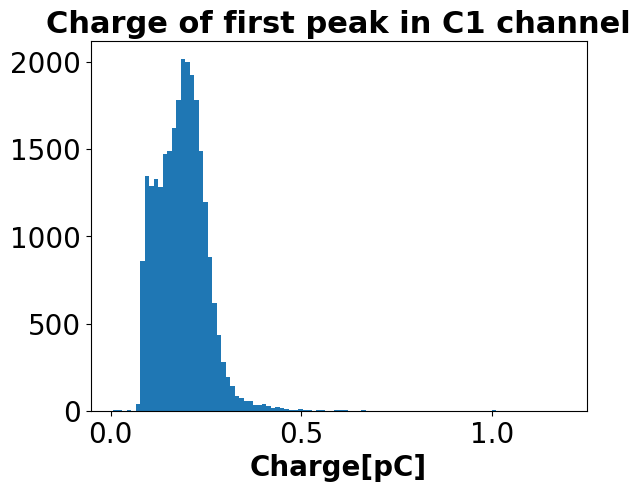

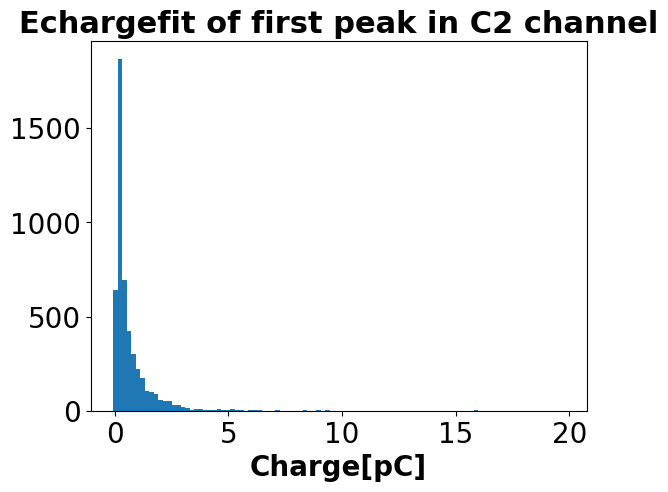

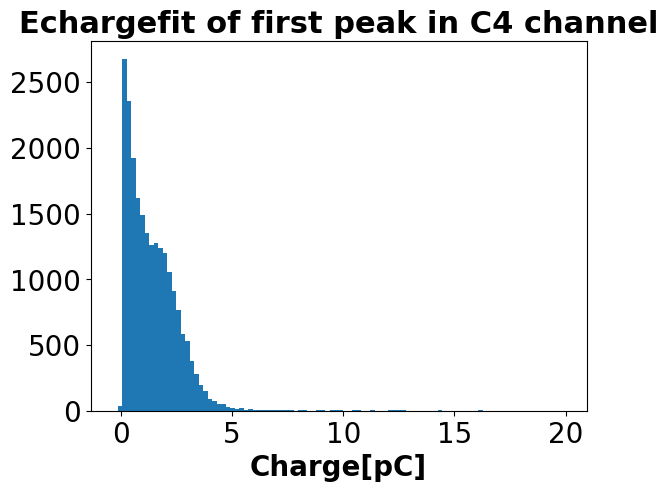

In [20]:
for channel in ['C1','C2', 'C4']:
    if channel == 'C1':
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.charge']
        df[f'peakparam_{channel}/peakparam_{channel}.charge_filtered'] = first_charges.apply(lambda x: x if (x > min_charge) & (x < max_charge) else np.nan)
        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge) & (first_charges < max_charge)]
        first_charges_outliers = first_charges[(first_charges< min_charge) | (first_charges > max_charge)]
    else:
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.echargefit']
        df[f'peakparam_{channel}/peakparam_{channel}.echargefit_filtered'] = first_charges.apply(lambda x: x if (x > min_charge) & (x < max_charge) else np.nan)

        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge) & (first_charges < max_charge)]
        first_charges_outliers = first_charges[(first_charges< min_charge) | (first_charges > max_charge)]
    # Update the dataframe with the filtered amplitudes

    print(f'{channel} Number of outliers: {len(first_charges_outliers)} of {len(first_charges)}')
    print(f'{channel} Number after filter: {len(first_charges_filtered)} of {len(first_charges)}')
    #plot each channels amplitude in a histogram
    #print range of amplitudes
    print(f'{channel} channel: min = {np.nanmin(first_charges_filtered)}, max = {np.nanmax(first_charges_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_charges_filtered, bins=100)
    if channel == 'C1':
        ax.set_title(f'Charge of first peak in {channel} channel')
    else:
        ax.set_title(f'Echargefit of first peak in {channel} channel')
    ax.set_xlabel('Charge[pC]')
    ax.set_ylabel('')
plt.show()

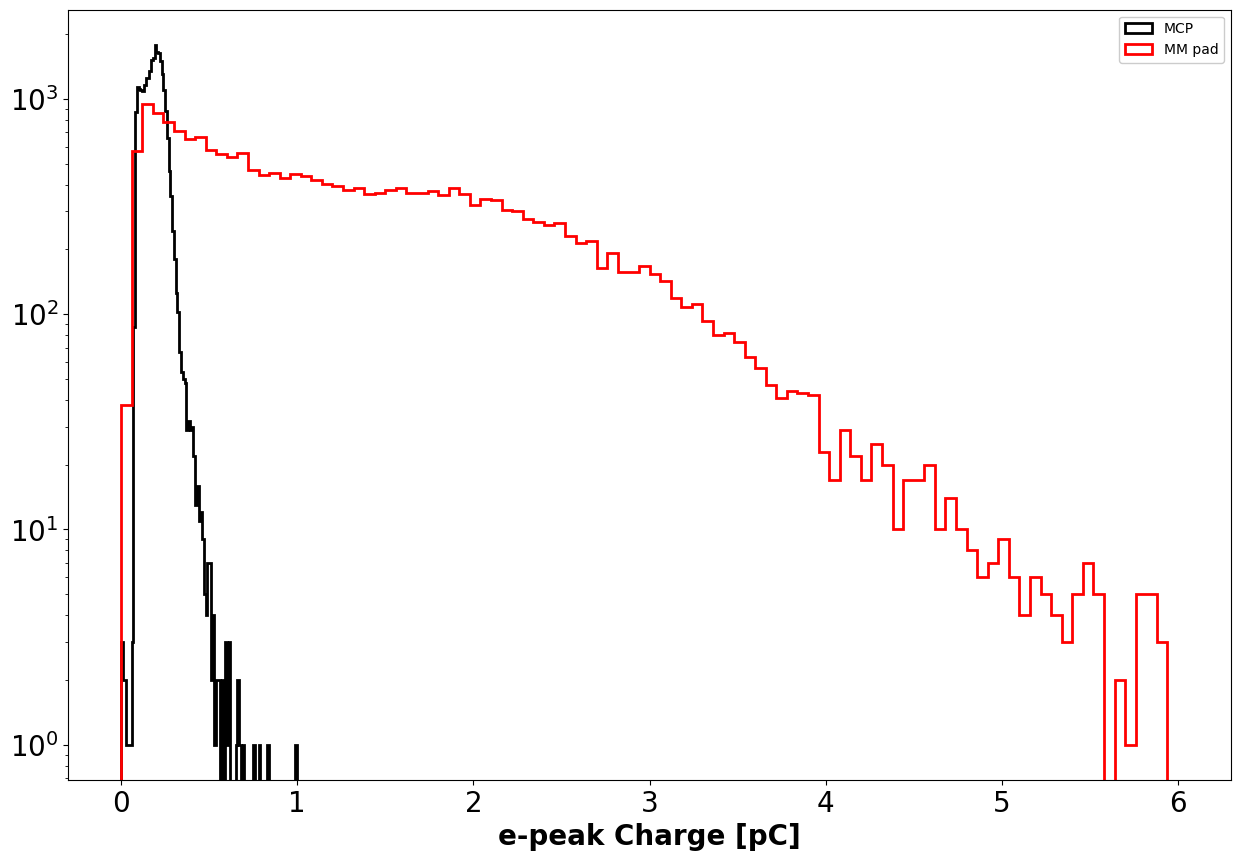

In [21]:
fig, axs = plt.subplots(figsize=(15, 10))
#for i in range(len(mcp_qs)):
axs.hist(df[f'peakparam_C1/peakparam_C1.charge_filtered'], bins=100, range=(0.0, 1.0), histtype='step', color='black', lw=2, label=f'MCP')
axs.hist(df[f'peakparam_C4/peakparam_C4.echargefit_filtered'], bins=100, range=(0.0, 6.0), histtype='step', color='red', lw=2, label=f'MM pad')
axs.set_yscale('log')
axs.set_xlabel('e-peak Charge [pC]')
axs.set_title('')
axs.legend()
plt.show()

C1 Number of outliers: 0 of 25984
C1 Number after filter: 25984 of 25984
C1 channel: min = 0.0067010960068495315, max = 1.1877907654227633
C2 Number of outliers: 21 of 25984
C2 Number after filter: 4967 of 25984
C2 channel: min = 0.13149981795361282, max = 48.99145113336151
C4 Number of outliers: 48 of 25984
C4 Number after filter: 21733 of 25984
C4 channel: min = 0.20159773797738173, max = 49.8734070391704


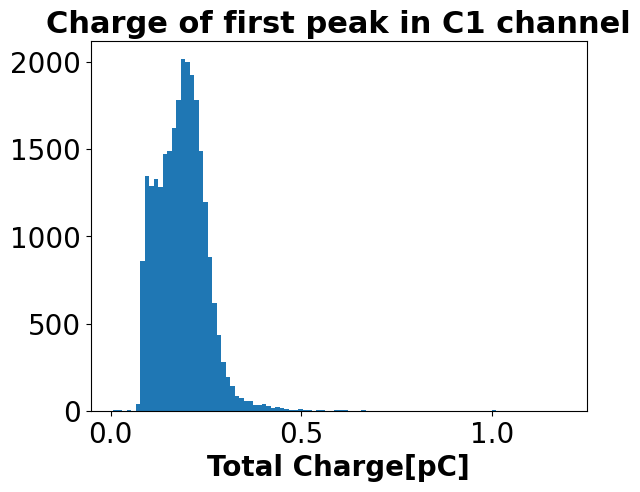

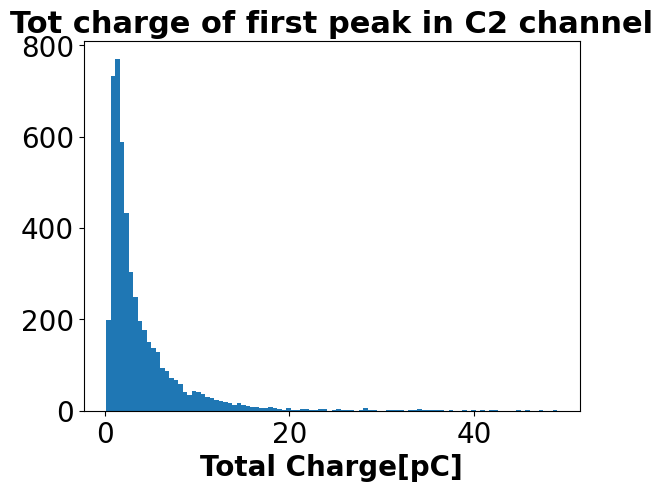

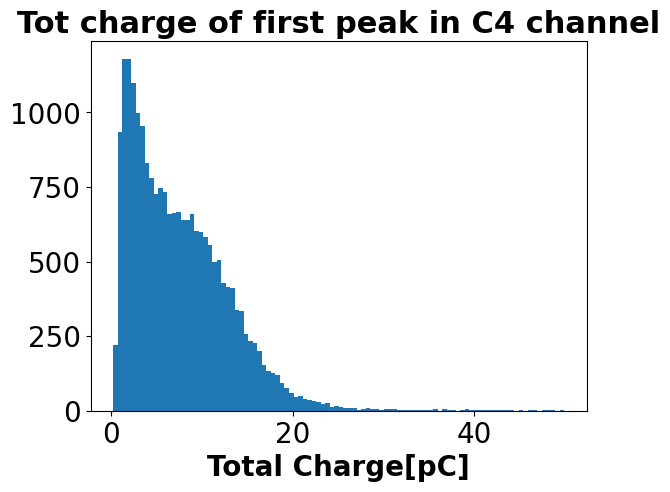

In [22]:
for channel in ['C1','C2', 'C4']:
    if channel == 'C1':
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.charge']
        df[f'peakparam_{channel}/peakparam_{channel}.charge_filtered'] = first_charges.apply(lambda x: x if (x > min_charge_tot) & (x < max_charge_tot) else np.nan)
        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge_tot) & (first_charges < max_charge_tot)]
        first_charges_outliers = first_charges[(first_charges< min_charge_tot) | (first_charges > max_charge_tot)]
    else:
        first_charges = df[f'peakparam_{channel}/peakparam_{channel}.totcharge']
        df[f'peakparam_{channel}/peakparam_{channel}.totcharge_filtered'] = first_charges.apply(lambda x: x if (x > min_charge_tot) & (x < max_charge_tot) else np.nan)

        first_charges = np.array(first_charges)
        first_charges_filtered = first_charges[(first_charges > min_charge_tot) & (first_charges < max_charge_tot)]
        first_charges_outliers = first_charges[(first_charges< min_charge_tot) | (first_charges > max_charge_tot)]
    # Update the dataframe with the filtered amplitudes

    print(f'{channel} Number of outliers: {len(first_charges_outliers)} of {len(first_charges)}')
    print(f'{channel} Number after filter: {len(first_charges_filtered)} of {len(first_charges)}')
    #plot each channels amplitude in a histogram
    #print range of amplitudes
    print(f'{channel} channel: min = {np.nanmin(first_charges_filtered)}, max = {np.nanmax(first_charges_filtered)}')
    fig, ax = plt.subplots()
    ax.hist(first_charges_filtered, bins=100)
    if channel == 'C1':
        ax.set_title(f'Charge of first peak in {channel} channel')
    else:
        ax.set_title(f'Tot charge of first peak in {channel} channel')
    ax.set_xlabel('Total Charge[pC]')
    ax.set_ylabel('')
plt.show()

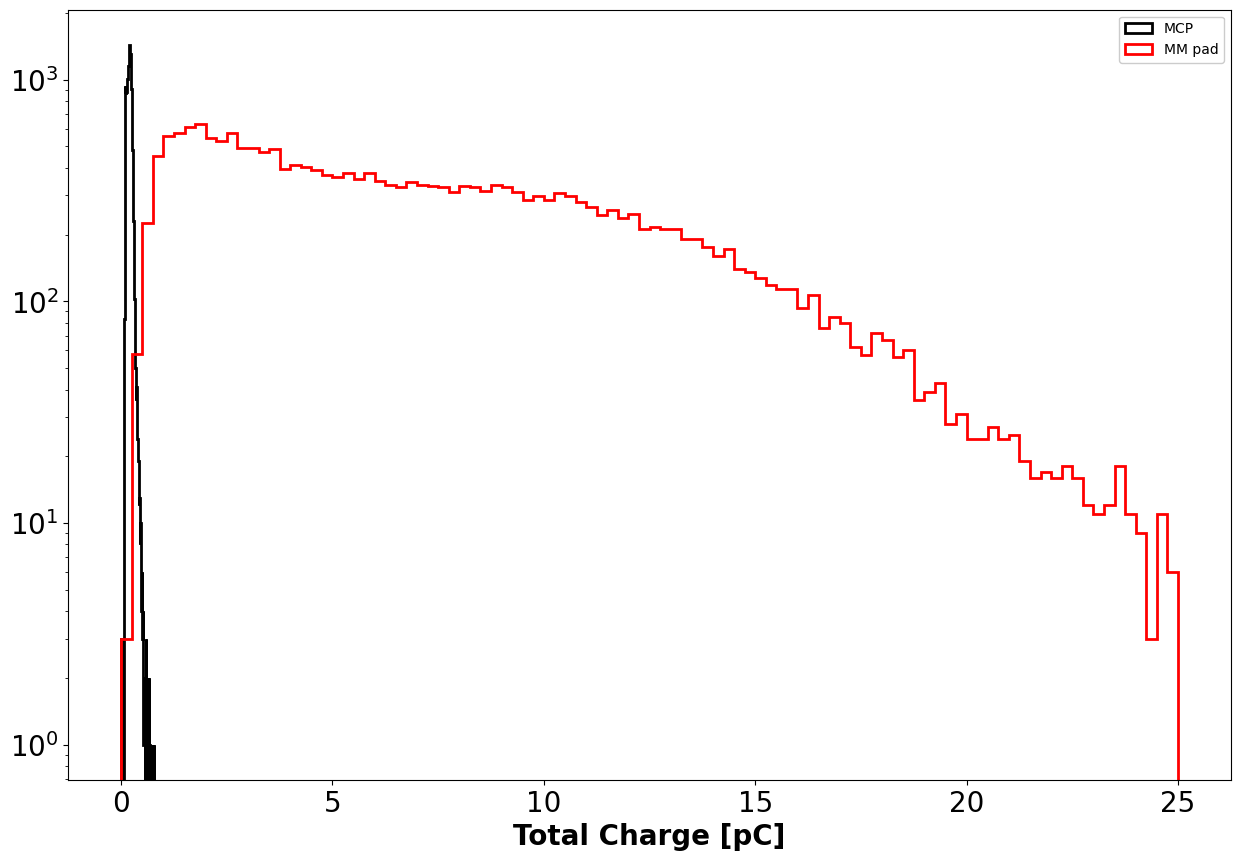

In [23]:
fig, axs = plt.subplots(figsize=(15, 10))
#for i in range(len(mcp_qs)):
axs.hist(df[f'peakparam_C1/peakparam_C1.charge_filtered'], bins=100, range=(0.0, 0.8), histtype='step', color='black', lw=2, label=f'MCP')
axs.hist(df[f'peakparam_C4/peakparam_C4.totcharge_filtered'], bins=100, range=(0.0, 25.0), histtype='step', color='red', lw=2, label=f'MM pad')
axs.set_yscale('log')
axs.set_xlabel('Total Charge [pC]')
axs.set_title('')
axs.legend()
plt.show()

Up Rejects:
      peakparam_C1/peakparam_C1.ampl  peakparam_C1/peakparam_C1.dampl  \
4444                        0.458306                           -999.0   
4492                        0.237517                           -999.0   
4504                        0.306263                           -999.0   
4517                        0.371106                           -999.0   
4521                        0.147619                           -999.0   

      peakparam_C1/peakparam_C1.charge  peakparam_C1/peakparam_C1.echargefit  \
4444                          0.317773                               -9999.0   
4492                          0.161774                               -9999.0   
4504                          0.204402                               -9999.0   
4517                          0.244336                               -9999.0   
4521                          0.102539                               -9999.0   

      peakparam_C1/peakparam_C1.echargefixed  \
4444                

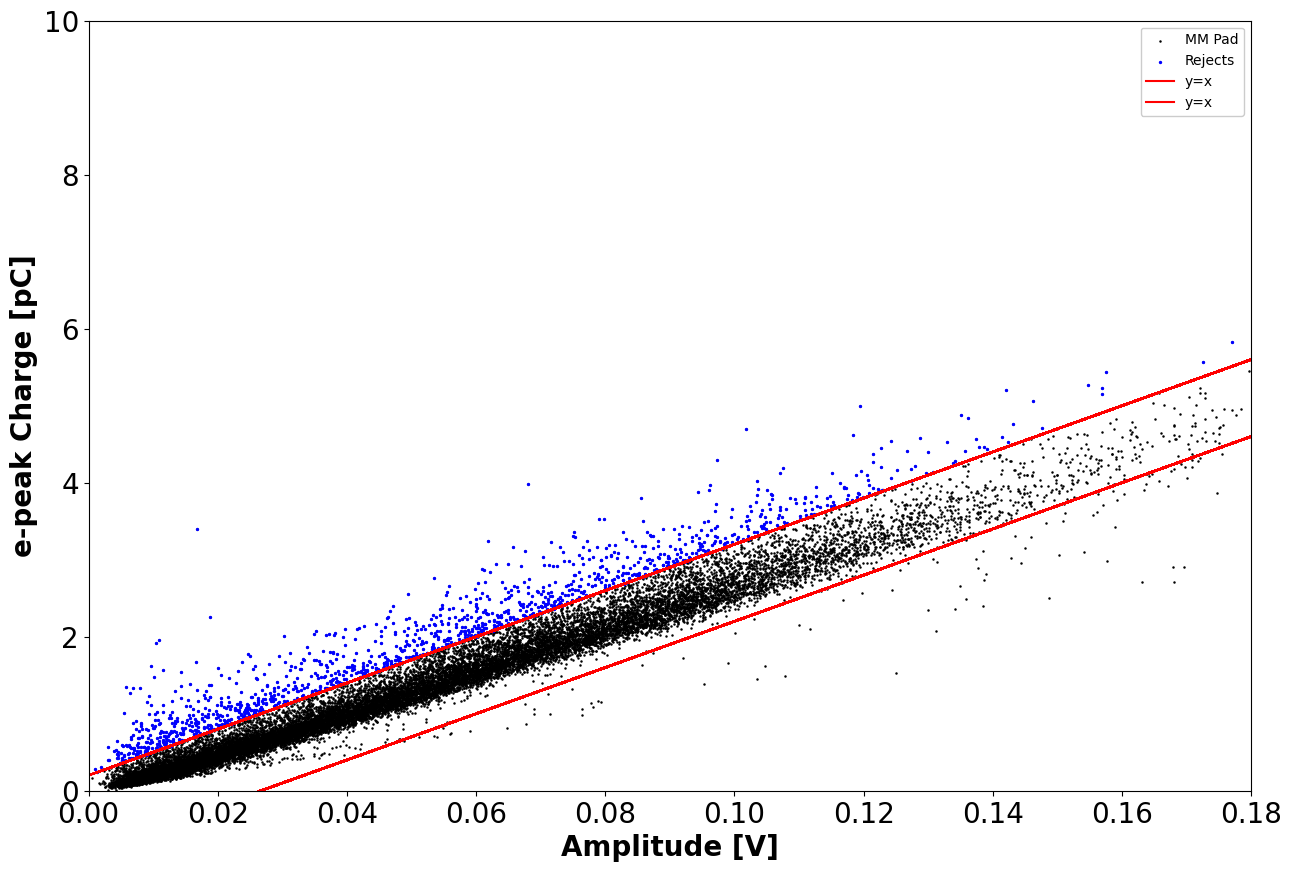

In [24]:
fig, axs = plt.subplots(figsize=(15, 10))

def line(x, a, b):
    return a*x + b

x = df[f'peakparam_C4/peakparam_C4.ampl_filtered']
y = df[f'peakparam_C4/peakparam_C4.echargefit_filtered']

up_slope, up_offset = 30, 0.2
up_rejects_filter = y > line(x, up_slope, up_offset)
up_rejects_x = x[up_rejects_filter]
up_rejects_y = y[up_rejects_filter]

up_rejects_df = df[up_rejects_filter]
print('Up Rejects:')
print(up_rejects_df.head())

#for i in range(len(mm_vs)):
axs.scatter(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], df[f'peakparam_C4/peakparam_C4.echargefit_filtered'], s=0.6, color='black', label=f'MM Pad')
axs.scatter(up_rejects_x, up_rejects_y, s=2, color='blue', label=f'Rejects')
axs.plot(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], line(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], 30, 0.2), color='red', label='y=x')
axs.plot(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], line(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], 30, -0.8), color='red', label='y=x')

axs.set_xlabel('Amplitude [V]')
axs.set_ylabel('e-peak Charge [pC]')
axs.set_xlim(0, 0.18)
axs.set_ylim(0, 10)
axs.legend()

plt.show()

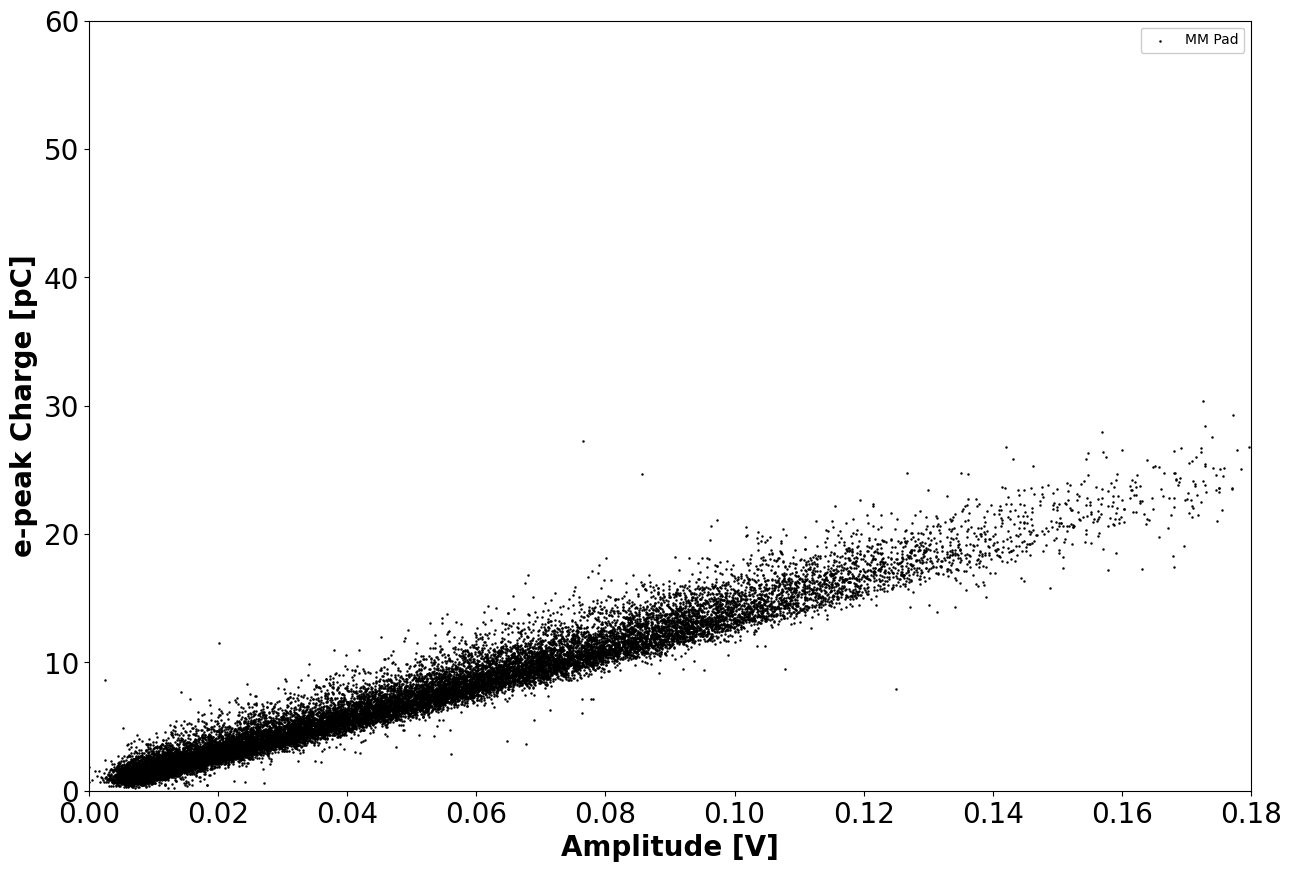

In [25]:
fig, axs = plt.subplots(figsize=(15, 10))

#for i in range(len(mm_vs)):
axs.scatter(df[f'peakparam_C4/peakparam_C4.ampl_filtered'], df[f'peakparam_C4/peakparam_C4.totcharge_filtered'], s=0.6, color='black', label=f'MM Pad')

axs.set_xlabel('Amplitude [V]')
axs.set_ylabel('e-peak Charge [pC]')
axs.set_xlim(0, 0.18)
axs.set_ylim(0, 60)
axs.legend()

plt.show()

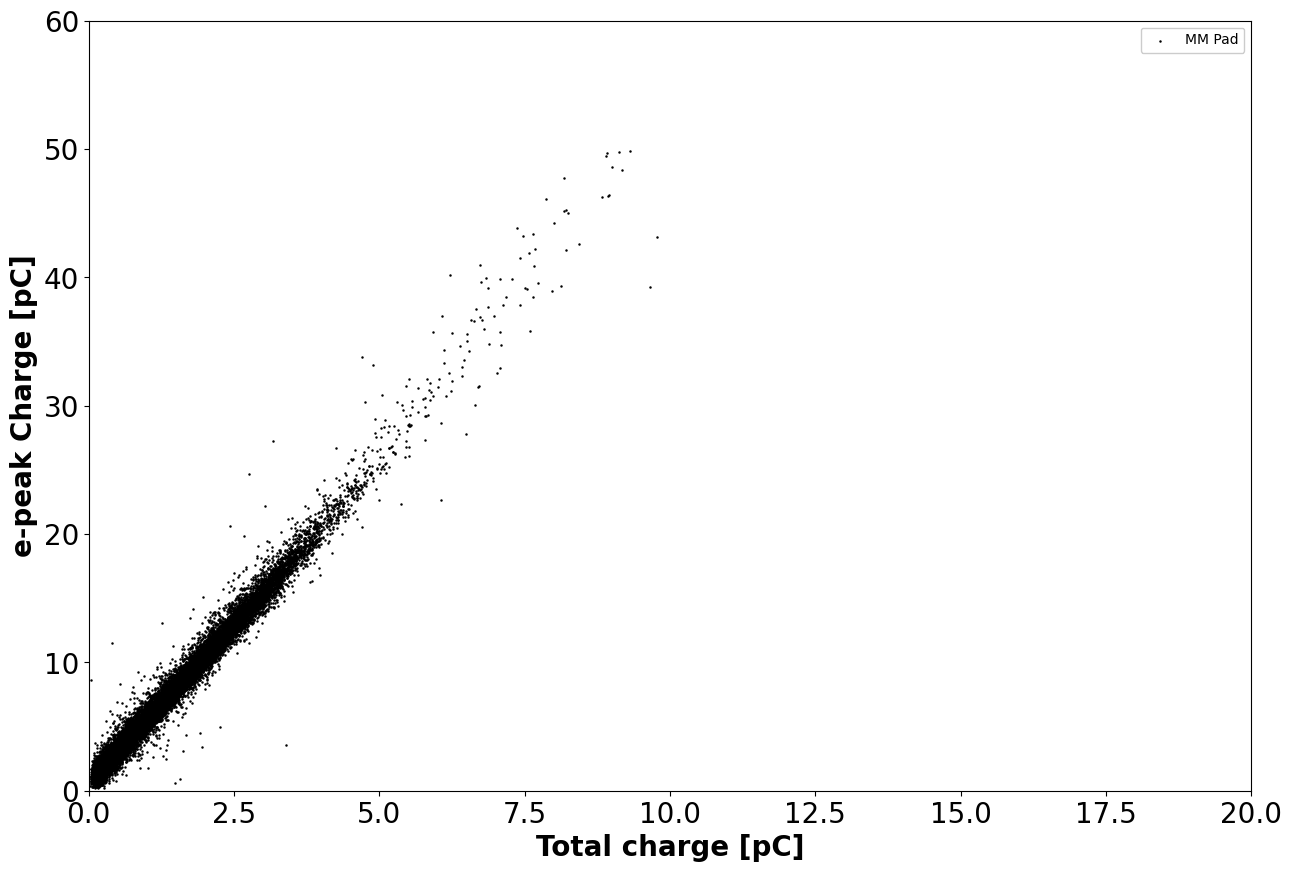

In [26]:
fig, axs = plt.subplots(figsize=(15, 10))

#for i in range(len(mm_vs)):
axs.scatter(df[f'peakparam_C4/peakparam_C4.echargefit_filtered'], df[f'peakparam_C4/peakparam_C4.totcharge_filtered'], s=0.6, color='black', label=f'MM Pad')

axs.set_xlabel('Total charge [pC]')
axs.set_ylabel('e-peak Charge [pC]')
axs.set_xlim(0, 20)
axs.set_ylim(0, 60)
axs.legend()

plt.show()

4416       35.293076
4417       25.653530
4418       26.117359
4419    -1111.000000
4420       31.524521
            ...     
30395      29.106817
30396      29.552073
30397      34.347374
30398      33.680374
30399      27.692238
Name: peakparam_C1/peakparam_C1.hitX[200], Length: 25946, dtype: float64


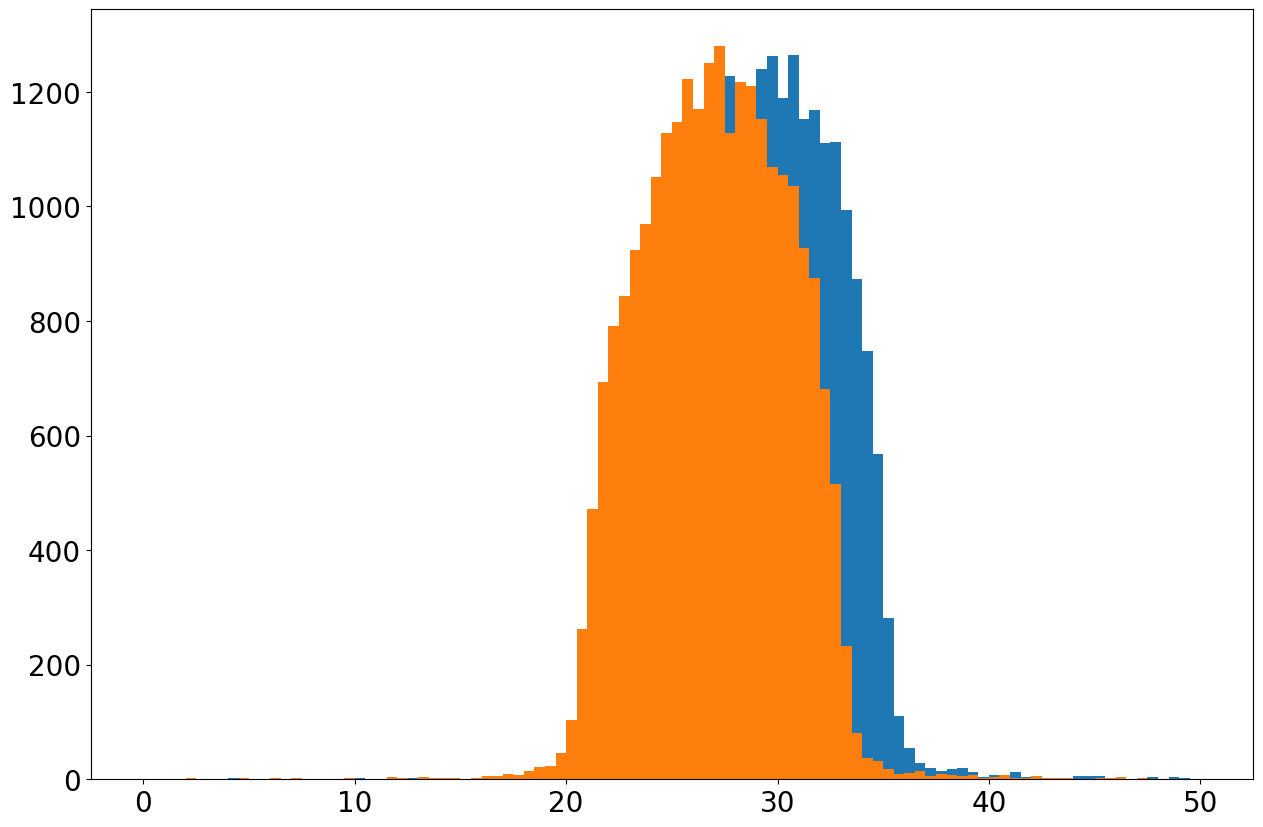

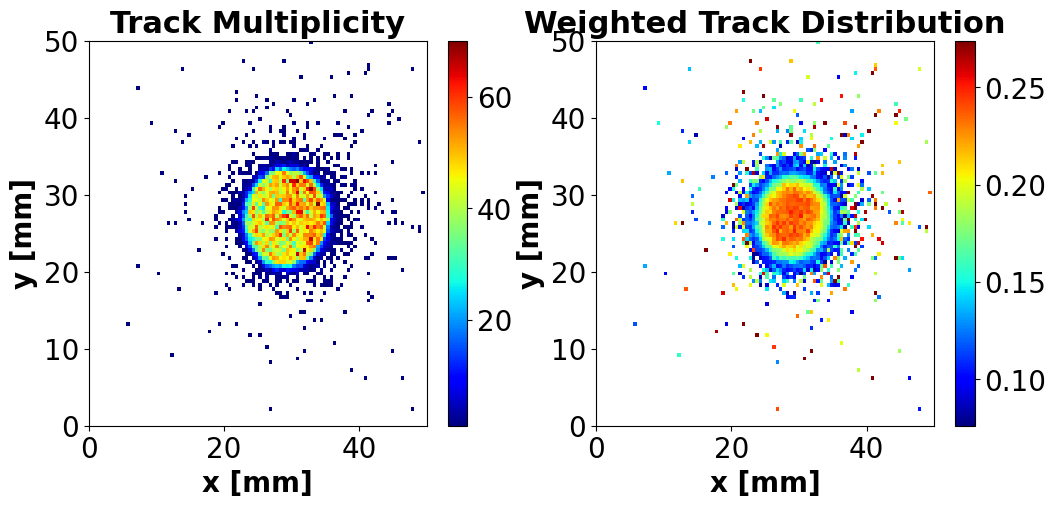

In [27]:
mcp_basic_charge_cut = (0 < df['peakparam_C1/peakparam_C1.charge_filtered']) & (df['peakparam_C1/peakparam_C1.charge_filtered'] < 0.5)
xs = df['peakparam_C1/peakparam_C1.hitX[200]'][mcp_basic_charge_cut]
ys = df['peakparam_C1/peakparam_C1.hitY[200]'][mcp_basic_charge_cut]
charges = df['peakparam_C1/peakparam_C1.charge_filtered'][mcp_basic_charge_cut]

print(xs)

# Define histogram bins
bins_x = np.linspace(0, 50, 101)  # 100 bins from 0 to 50
bins_y = np.linspace(0, 50, 101)

# Create 2D histogram (track multiplicity)
xytrks, _, _ = np.histogram2d(xs, ys, bins=[bins_x, bins_y])

# Create weighted histogram
xytrksW, _, _ = np.histogram2d(xs, ys, bins=[bins_x, bins_y], weights=charges)

# Normalize by dividing the weighted histogram by the original histogram
xytrksW /= np.where(xytrks > 0, xytrks, 1)  # Avoid division by zero

# Plot the results

# Mask xytrks <1
masked_xy_trks = np.ma.masked_less(xytrks, 1)
masked_xy_trksW = np.ma.masked_equal(xytrksW, 0)

# Plot 1D of xs
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(xs, bins=bins_x)
ax.hist(ys, bins=bins_y)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot xytrks
im1 = axs[0].imshow(masked_xy_trks.T, origin="lower", extent=[0, 50, 0, 50], cmap='jet', aspect="auto")
axs[0].set_title("Track Multiplicity")
axs[0].set_xlabel("x [mm]")
axs[0].set_ylabel("y [mm]")
fig.colorbar(im1, ax=axs[0])

# Plot xytrksW
im2 = axs[1].imshow(masked_xy_trksW.T, origin="lower", extent=[0, 50, 0, 50], cmap='jet', aspect="auto", vmax=np.max(masked_xy_trksW) / 1.8)
axs[1].set_title("Weighted Track Distribution")
axs[1].set_xlabel("x [mm]")
axs[1].set_ylabel("y [mm]")
fig.colorbar(im2, ax=axs[1])

4417     26.161333
4418     26.432331
4422     33.833408
4424     32.715542
4425     33.628815
           ...    
30383    32.021065
30392    33.967331
30394    31.064772
30397    35.576050
30398    33.713982
Name: peakparam_C4/peakparam_C4.hitX[200], Length: 15338, dtype: float64


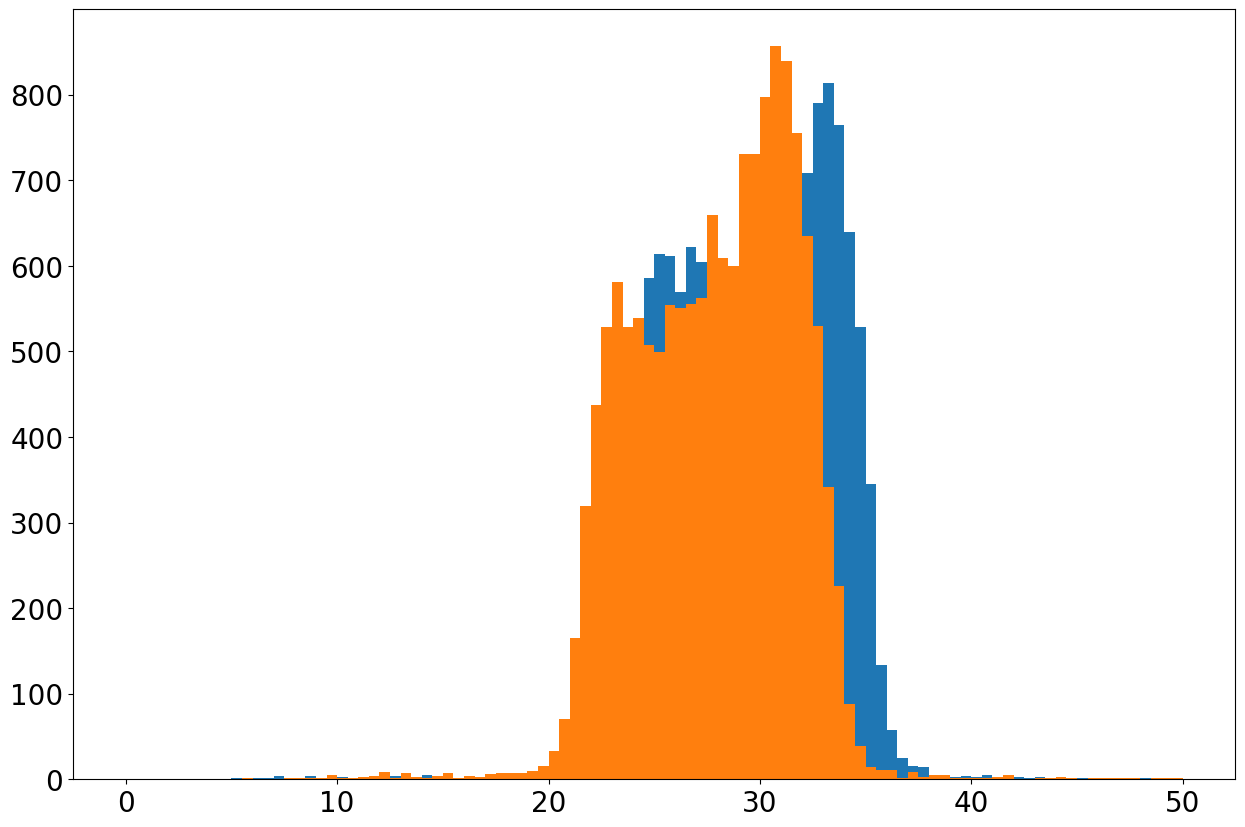

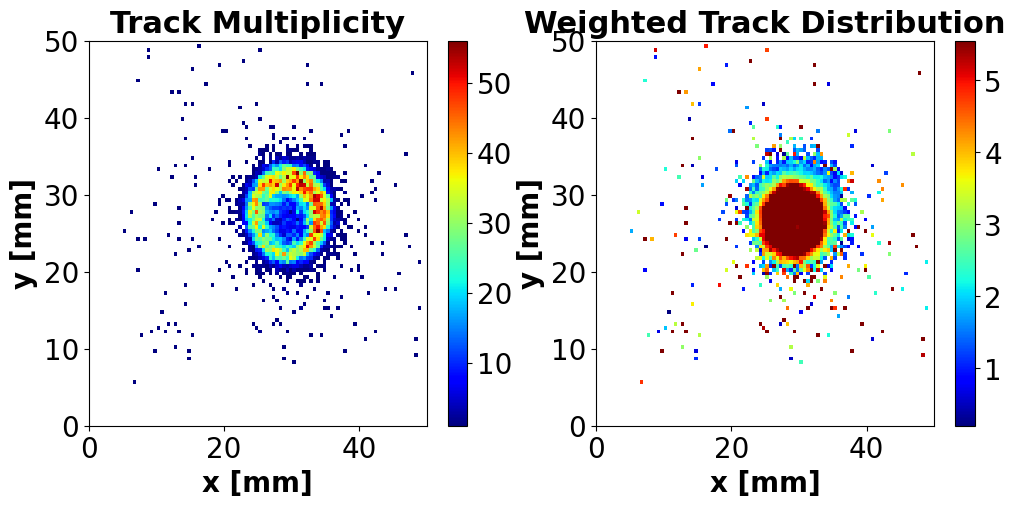

In [30]:
mm_basic_charge_cut = (0 < df['peakparam_C4/peakparam_C4.totcharge_filtered']) & (df['peakparam_C4/peakparam_C4.totcharge_filtered'] < 10)
xs = df['peakparam_C4/peakparam_C4.hitX[200]'][mm_basic_charge_cut]
ys = df['peakparam_C4/peakparam_C4.hitY[200]'][mm_basic_charge_cut]
charges = df['peakparam_C4/peakparam_C4.totcharge_filtered'][mm_basic_charge_cut]

print(xs)

# Define histogram bins
bins_x = np.linspace(0, 50, 101)  # 100 bins from 0 to 50
bins_y = np.linspace(0, 50, 101)

# Create 2D histogram (track multiplicity)
xytrks, _, _ = np.histogram2d(xs, ys, bins=[bins_x, bins_y])

# Create weighted histogram
xytrksW, _, _ = np.histogram2d(xs, ys, bins=[bins_x, bins_y], weights=charges)

# Normalize by dividing the weighted histogram by the original histogram
xytrksW /= np.where(xytrks > 0, xytrks, 1)  # Avoid division by zero

# Plot the results

# Mask xytrks <1
masked_xy_trks = np.ma.masked_less(xytrks, 1)
masked_xy_trksW = np.ma.masked_equal(xytrksW, 0)

# Plot 1D of xs
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(xs, bins=bins_x)
ax.hist(ys, bins=bins_y)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot xytrks
im1 = axs[0].imshow(masked_xy_trks.T, origin="lower", extent=[0, 50, 0, 50], cmap='jet', aspect="auto")
axs[0].set_title("Track Multiplicity")
axs[0].set_xlabel("x [mm]")
axs[0].set_ylabel("y [mm]")
fig.colorbar(im1, ax=axs[0])

# Plot xytrksW
im2 = axs[1].imshow(masked_xy_trksW.T, origin="lower", extent=[0, 50, 0, 50], cmap='jet', aspect="auto", vmax=np.max(masked_xy_trksW) / 1.8)
axs[1].set_title("Weighted Track Distribution")
axs[1].set_xlabel("x [mm]")
axs[1].set_ylabel("y [mm]")
fig.colorbar(im2, ax=axs[1])